# Data

In [82]:
import os
import pandas as pd
import numpy as np

dfs = []
samples_path = "res/samples"
for csv_name in os.listdir(samples_path):
    file_path = os.path.join(samples_path, csv_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

df = pd.concat(dfs).dropna().reset_index(drop=True)

float64_cols = df.select_dtypes(include='float64').columns
mapper = {col_name: np.float32 for col_name in float64_cols}
df = df.astype(mapper)

df

,is_bomb_planted,losing_streak_defender,losing_streak_attacker,balance_attacker,health_attacker,has_helmet_attacker,duck_amount_attacker,flash_duration_attacker,armor_value_attacker,current_equip_value_attacker,...,pitch_defender,yaw_defender,Y_defender,Z_defender,velocity_defender,steamid_defender,name_defender,attacker_won,crosshair_alignment_attacker,crosshair_alignment_defender
0,False,1.0,1.0,0.0,100.0,False,0.000000,0.000000,0.0,700.0,...,-0.395844,-96.449661,2699.465088,32.753517,9.686946,7.656120e+16,hoax,True,0.999896,0.999950
1,False,1.0,1.0,300.0,100.0,False,0.000000,0.000000,0.0,700.0,...,12.874268,-142.557907,1876.031372,79.031250,0.000000,7.656120e+16,koala,False,0.930805,0.999036
2,False,1.0,1.0,150.0,100.0,False,0.000000,0.000000,100.0,850.0,...,0.387268,-177.328613,1873.216064,0.019687,102.906570,7.656120e+16,koala,False,0.996616,0.993701
3,False,1.0,1.0,150.0,99.0,False,0.000000,5.102953,100.0,850.0,...,0.760468,-95.534706,2485.268066,28.123428,52.568737,7.656120e+16,ninjaZ,True,0.999489,0.998759
4,False,1.0,1.0,150.0,72.0,False,0.629271,0.000000,87.0,950.0,...,0.992203,-93.443527,1261.932861,0.273994,72.984245,7.656120e+16,happ,True,0.999888,0.999120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34072,False,4.0,0.0,5050.0,100.0,True,0.000000,0.000000,95.0,7350.0,...,-2.864349,-150.314606,1448.483521,-112.116943,124.477043,7.656120e+16,robiin,True,0.998336,0.999803
34073,False,4.0,0.0,5150.0,100.0,True,0.000000,0.000000,95.0,7350.0,...,3.748749,4.517441,1042.031250,37.281601,0.000000,7.656120e+16,PlesseN,False,0.941991,0.999283
34074,False,2.0,1.0,0.0,43.0,True,0.014737,0.000000,66.0,4600.0,...,4.019623,-151.820068,2372.898438,-120.126709,76.501221,7.656120e+16,robiin,True,0.992249,-0.127859
34075,False,2.0,1.0,300.0,43.0,True,0.000000,0.982825,66.0,4300.0,...,2.948120,-134.178436,1922.635498,2.368601,88.837196,7.656120e+16,twist,True,0.955268,-0.715795


In [83]:
X = df.drop(
    ["pitch_attacker", "yaw_attacker", "pitch_defender", "yaw_defender",
     "tick", "steamid_attacker", "steamid_defender", "name_attacker",
     "name_defender", "attacker_won"], axis="columns")
X_feature_names = X.columns
y = df["attacker_won"].astype(int)

print(f"{X.shape=}, {y.shape=}")
print(X_feature_names.values)

X.shape=(34077, 27), y.shape=(34077,)
['is_bomb_planted' 'losing_streak_defender' 'losing_streak_attacker'
 'balance_attacker' 'health_attacker' 'has_helmet_attacker'
 'duck_amount_attacker' 'flash_duration_attacker' 'armor_value_attacker'
 'current_equip_value_attacker' 'X_attacker' 'Y_attacker' 'Z_attacker'
 'velocity_attacker' 'balance_defender' 'health_defender'
 'has_helmet_defender' 'duck_amount_defender' 'flash_duration_defender'
 'armor_value_defender' 'current_equip_value_defender' 'X_defender'
 'Y_defender' 'Z_defender' 'velocity_defender'
 'crosshair_alignment_attacker' 'crosshair_alignment_defender']


In [84]:
import numpy as np

# feature normalization
X_norm = X.copy()

# 'is_bomb_planted' is boolean
X_norm["is_bomb_planted"] = X["is_bomb_planted"].astype(np.float32)
# 'has_helmet_attacker' and 'has_helmet_defender' are booleans
X_norm["has_helmet_attacker"] = X["has_helmet_attacker"].astype(np.float32)
X_norm["has_helmet_defender"] = X["has_helmet_defender"].astype(np.float32)

# 'duck_amount_attacker' and 'duck_amount_defender' is already in range [0, 1]

# 'crosshair_alignment_attacker' and 'crosshair_alignment_defender' are booleans
X_norm["crosshair_alignment_attacker"] = X["crosshair_alignment_attacker"].astype(np.float32)
X_norm["crosshair_alignment_defender"] = X["crosshair_alignment_defender"].astype(np.float32)

# 'losing_streak_defender' and 'losing_streak_attacker' should be max absolute scaled
max_losing_streak = max(X["losing_streak_attacker"].max(), X["losing_streak_defender"].max())
X_norm["losing_streak_attacker"] /= max_losing_streak
X_norm["losing_streak_defender"] /= max_losing_streak

# 'balance_attacker' and 'balance_defender' should be max absolute scaled
max_balance = max(X["balance_attacker"].max(), X["balance_defender"].max())
X_norm["balance_attacker"] /= max_balance
X_norm["balance_defender"] /= max_balance

# 'health_attacker', 'health_defender', 'armor_value_attacker', and 'armor_value_defender' should be max absolute scaled, their max is 100
X_norm["health_attacker"] /= 100
X_norm["health_defender"] /= 100
X_norm["armor_value_attacker"] /= 100
X_norm["armor_value_defender"] /= 100

# 'flash_duration_attacker' and 'flash_duration_defender' should be max absolute scaled
max_flash_duration = max(X["flash_duration_attacker"].max(), X["flash_duration_defender"].max())
X_norm["flash_duration_attacker"] /= max_flash_duration
X_norm["flash_duration_defender"] /= max_flash_duration

# 'current_equip_value_attacker' and 'current_equip_value_defender' should be max absolute scaled
max_current_equip_value = max(X["current_equip_value_attacker"].max(), X["current_equip_value_defender"].max())
X_norm["current_equip_value_attacker"] /= max_current_equip_value
X_norm["current_equip_value_defender"] /= max_current_equip_value

# 'X_attacker', 'Y_attacker', 'Z_attacker', 'X_defender', 'Y_defender', 'Z_defender' should be standard scaled
X_std = pd.concat([X["X_attacker"], X["X_defender"]], axis="rows").std()
X_mean = pd.concat([X["X_attacker"], X["X_defender"]], axis="rows").mean()
Y_std = pd.concat([X["Y_attacker"], X["Y_defender"]], axis="rows").std()
Y_mean = pd.concat([X["Y_attacker"], X["Y_defender"]], axis="rows").mean()
Z_std = pd.concat([X["Z_attacker"], X["Z_defender"]], axis="rows").std()
Z_mean = pd.concat([X["Z_attacker"], X["Z_defender"]], axis="rows").mean()
X_norm["X_attacker"] -= X_mean
X_norm["X_attacker"] /= X_std
X_norm["X_defender"] -= X_mean
X_norm["X_defender"] /= X_std
X_norm["Y_attacker"] -= Y_mean
X_norm["Y_attacker"] /= Y_std
X_norm["Y_defender"] -= Y_mean
X_norm["Y_defender"] /= Y_std
X_norm["Z_attacker"] -= Z_mean
X_norm["Z_attacker"] /= Z_std
X_norm["Z_defender"] -= Z_mean
X_norm["Z_defender"] /= Z_std

# 'velocity_attacker' and 'velocity_defender' should be max absolute scaled
max_velocity = max(X["velocity_attacker"].max(), X["velocity_defender"].max())
X_norm["velocity_attacker"] /= max_velocity
X_norm["velocity_defender"] /= max_velocity

In [85]:
model_metrics = {}

# Gradient Boosted Ensemble

In [86]:
from sklearn.model_selection import train_test_split

split_train = 0.75
split_test = 0.1
split_val = 0.15
assert abs(split_train + split_test + split_val - 1) < 1e-10

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=410,
    test_size=(1 - split_train)
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=410,
    test_size=(split_test / (split_test + split_val))
)

print("train:", len(X_train), "\nval:", len(X_val), "\ntest:", len(X_test))

train: 15334 
val: 10223 
test: 8520


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

ensemble = GradientBoostingClassifier().fit(X_train, y_train)

y_test_pred = ensemble.predict(X_test)
print("acc      ", accuracy_score(y_test, y_test_pred))
print("precision", precision_score(y_test, y_test_pred))
print("recall   ", recall_score(y_test, y_test_pred))
print("f1       ", f1_score(y_test, y_test_pred))
print("auroc    ", roc_auc_score(y_test, y_test_pred))

acc       0.7582159624413145
precision 0.7567567567567568
recall    0.7319814317126802
f1        0.7441629408842524
auroc     0.7572263155852761


# Logistic Regression

In [88]:
from sklearn.model_selection import train_test_split

# repeat split, except use normalized data
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_norm, y, random_state=410,
    test_size=(1 - split_train)
)
X_train_norm, X_val_norm, y_train, y_val = train_test_split(
    X_train_norm, y_train, random_state=410,
    test_size=(split_test / (split_test + split_val))
)

print("train:", len(X_train), "\nval:", len(X_val), "\ntest:", len(X_test))

train: 15334 
val: 10223 
test: 8520


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, auc

logreg = LogisticRegression().fit(X_train_norm, y_train)

y_test_pred = logreg.predict(X_test_norm)
print("acc      ", accuracy_score(y_test, y_test_pred))
print("precision", precision_score(y_test, y_test_pred))
print("recall   ", recall_score(y_test, y_test_pred))
print("f1       ", f1_score(y_test, y_test_pred))
print("auroc    ", roc_auc_score(y_test, y_test_pred))

acc       0.72018779342723
precision 0.7233986928104575
recall    0.6760322501832396
f1        0.6989138671381662
auroc     0.7185221110866503


# ANN

In [90]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import numpy as np

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

train_dataset = TensorDataset(torch.tensor(X_train_norm.values.astype(np.float32)),
                              torch.tensor(y_train.values.astype(np.float32)))
val_dataset = TensorDataset(torch.tensor(X_val_norm.values.astype(np.float32)),
                            torch.tensor(y_val.values.astype(np.float32)))
test_dataset = TensorDataset(torch.tensor(X_test_norm.values.astype(np.float32)),
                             torch.tensor(y_test.values.astype(np.float32)))

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

for X, y in val_dataloader:
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Using mps device
Shape of X: torch.Size([64, 27])
Shape of y: torch.Size([64]) torch.float32


In [91]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(27, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


ann = NeuralNetwork().to(device)
print(ann)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=27, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [92]:
def brier_loss(y_pred, y_true):
    """
    Calculates the Brier score loss.

    Args:
        y_pred (torch.Tensor): Predicted probabilities, shape (batch_size)
        y_true (torch.Tensor): true labels, shape (batch_size)

    Returns:
        torch.Tensor: Brier score loss
    """
    return torch.mean((y_pred - y_true) ** 2)


adam_optimizer = torch.optim.Adam(ann.parameters())

In [93]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X).squeeze()
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [94]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train(train_dataloader, ann, brier_loss, adam_optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 0.257304  [   64/15334]
loss: 0.197930  [ 6464/15334]
loss: 0.192822  [12864/15334]
Epoch 2
-------------------------------
loss: 0.183692  [   64/15334]
loss: 0.170635  [ 6464/15334]
loss: 0.184163  [12864/15334]
Epoch 3
-------------------------------
loss: 0.193939  [   64/15334]
loss: 0.160999  [ 6464/15334]
loss: 0.153195  [12864/15334]
Epoch 4
-------------------------------
loss: 0.163596  [   64/15334]
loss: 0.208406  [ 6464/15334]
loss: 0.204286  [12864/15334]
Epoch 5
-------------------------------
loss: 0.183755  [   64/15334]
loss: 0.195030  [ 6464/15334]
loss: 0.182170  [12864/15334]
Epoch 6
-------------------------------
loss: 0.146739  [   64/15334]
loss: 0.174724  [ 6464/15334]
loss: 0.167822  [12864/15334]
Epoch 7
-------------------------------
loss: 0.169924  [   64/15334]
loss: 0.158443  [ 6464/15334]
loss: 0.192145  [12864/15334]
Epoch 8
-------------------------------
loss: 0.155221  [   64/15334]
loss: 0.203570  [ 64

In [95]:
from torcheval.metrics import BinaryAccuracy, BinaryRecall, BinaryPrecision, BinaryF1Score, BinaryAUROC


def test(dataloader, model):
    model.eval()
    met = {
        "accuracy": BinaryAccuracy(),
        "recall": BinaryRecall(),
        "precision": BinaryPrecision(),
        "f1": BinaryF1Score(),
        "auroc": BinaryAUROC()
    }

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X).squeeze()
        for metric in met.values():
            metric.update(pred, y.long())

    for metric in met:
        print(metric, met[metric].compute())


test(test_dataloader, ann)

accuracy tensor(0.6854)
recall tensor(0.6792)
precision tensor(0.6704)
f1 tensor(0.6748)
auroc tensor(0.7696, dtype=torch.float64)


# ROC

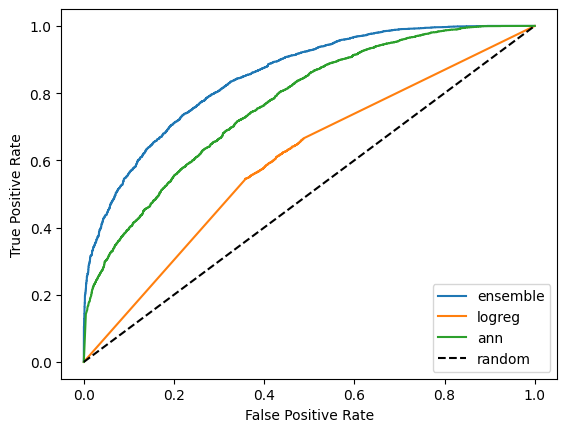

In [96]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, ensemble.predict_proba(X_test)[:, 1])

model_metrics["ensemble"] = {
    "fpr": fpr,
    "tpr": tpr,
}

fpr, tpr, _ = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

model_metrics["logreg"] = {
    "fpr": fpr,
    "tpr": tpr,
}

ann_y_test_pred = []
for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_test_pred = ann(X).squeeze()
    ann_y_test_pred.extend(y_test_pred.tolist())

fpr, tpr, _ = metrics.roc_curve(y_test, ann_y_test_pred)

model_metrics["ann"] = {
    "fpr": fpr,
    "tpr": tpr,
}

for metric in model_metrics.keys():
    fpr, tpr = model_metrics[metric]["fpr"], model_metrics[metric]["tpr"]
    plt.plot(fpr, tpr, label=metric)
plt.plot([0, 1], [0, 1], 'k--', label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# SHAP

In [143]:
import shap

batch = next(iter(test_dataloader))
batch[0] = batch[0].to(device)


def ann_np(X_np):
    tensor = torch.tensor(X_np).to(device)
    pred = ann(tensor)
    return pred.flatten().detach().cpu().numpy()


ensemble_shap_values = shap.TreeExplainer(ensemble, feature_names=X_feature_names)(X_test)
logreg_shap_values = shap.Explainer(logreg, X_test_norm, feature_names=X_feature_names)(X_test_norm)
ann_shap_values = shap.KernelExplainer(ann_np, X_test_norm.values[:100], feature_names=X_feature_names)(
    X_test_norm.values[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
idx = 0
print(y_test[idx])

1


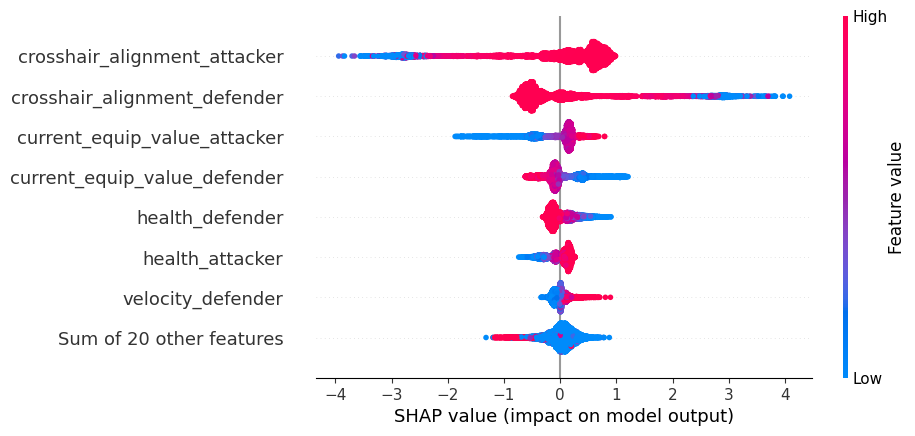

In [142]:
shap.plots.beeswarm(ensemble_shap_values, max_display=8)

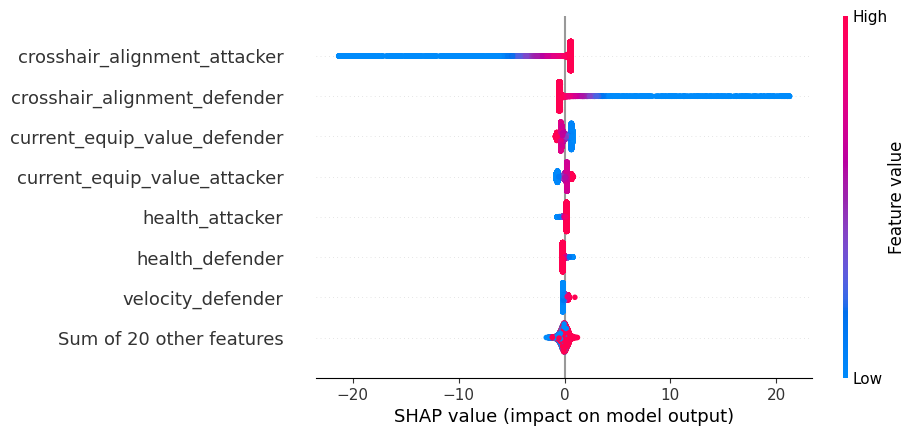

In [141]:
shap.plots.beeswarm(logreg_shap_values, max_display=8)

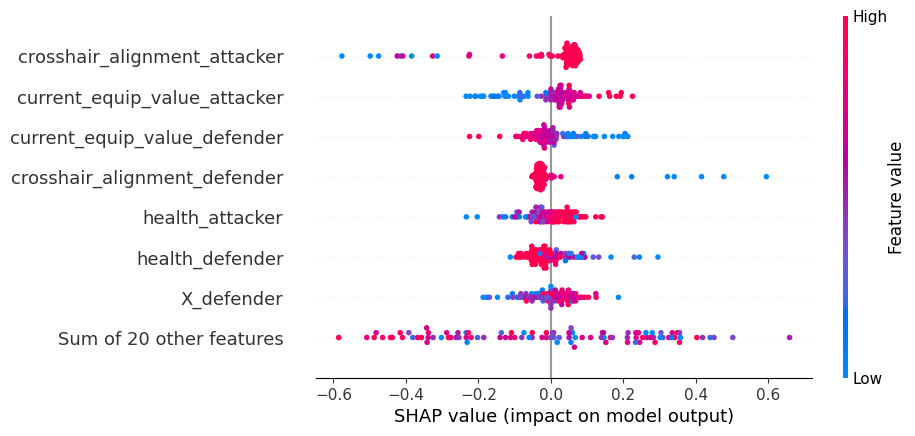

In [144]:
shap.plots.beeswarm(ann_shap_values, max_display=8)